<a href="https://colab.research.google.com/github/Diksha566/song-clustering/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install pandas scikit-learn matplotlib sqlalchemy spotipy

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [4]:

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='e74cc12740', client_secret='24828f78b'))


In [5]:
def fetch_spotify_data(track_ids):
    features = []
    for track_id in track_ids:
        try:
            audio_features = sp.audio_features(track_id)[0]
            features.append(audio_features)
        except:
            pass
    return pd.DataFrame(features)


In [6]:

playlist_id = 'https://open.spotify.com/playlist/uSk2rX7'

results = sp.playlist_tracks(playlist_id)
track_ids = [item['track']['id'] for item in results['items'] if item['track']['id'] is not None]


In [7]:

engine = create_engine('sqlite:///spotify_data.db', echo=False)

# Fetch song data from Spotify
df = fetch_spotify_data(track_ids)

# database
df.to_sql('song_data', con=engine, index=False, if_exists='replace')

100

In [8]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.784,0.430,10,-8.756,0,0.0364,0.1230,0.0,0.0887,0.236,127.087,audio_features,2rRJrJEo19S2J82BDsQ3F7,spotify:track:2rRJrJEo19S2J82BDsQ3F7,https://api.spotify.com/v1/tracks/2rRJrJEo19S2...,https://api.spotify.com/v1/audio-analysis/2rRJ...,159382,4
1,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.0,0.1500,0.472,149.996,audio_features,0BGwAKW4u8kWOhWFflZxfl,spotify:track:0BGwAKW4u8kWOhWFflZxfl,https://api.spotify.com/v1/tracks/0BGwAKW4u8kW...,https://api.spotify.com/v1/audio-analysis/0BGw...,132780,4
2,0.652,0.557,1,-5.714,0,0.0318,0.7400,0.0,0.1240,0.483,150.073,audio_features,2qxmye6gAegTMjLKEBoR3d,spotify:track:2qxmye6gAegTMjLKEBoR3d,https://api.spotify.com/v1/tracks/2qxmye6gAegT...,https://api.spotify.com/v1/audio-analysis/2qxm...,169354,4
3,0.697,0.683,1,-2.881,0,0.1170,0.0372,0.0,0.1370,0.603,96.133,audio_features,2BgEsaKNfHUdlh97KmvFyo,spotify:track:2BgEsaKNfHUdlh97KmvFyo,https://api.spotify.com/v1/tracks/2BgEsaKNfHUd...,https://api.spotify.com/v1/audio-analysis/2BgE...,186987,4
4,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.0,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4


In [9]:
# Load data from the database
engine = create_engine('sqlite:///song_data.db')

# Drop unnecessary columns
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)

# Fill missing values (if any)
df = df.dropna()

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

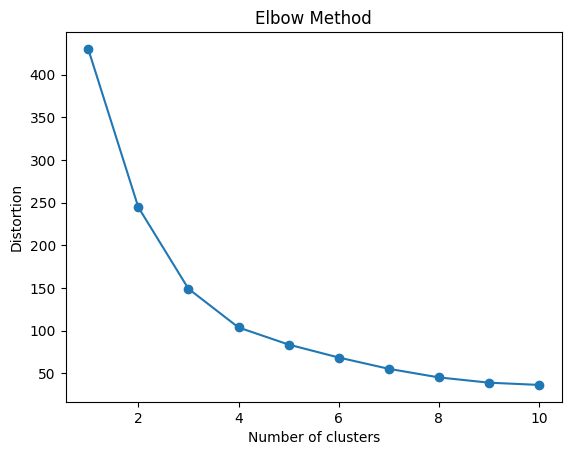

In [10]:
# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:

# Perform K-Means clustering k =3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df_pca)



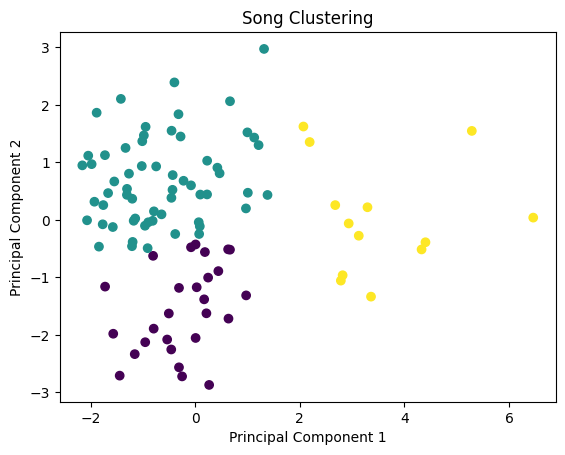

In [12]:
# Visualize the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Song Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
print(df.columns)


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'cluster'],
      dtype='object')


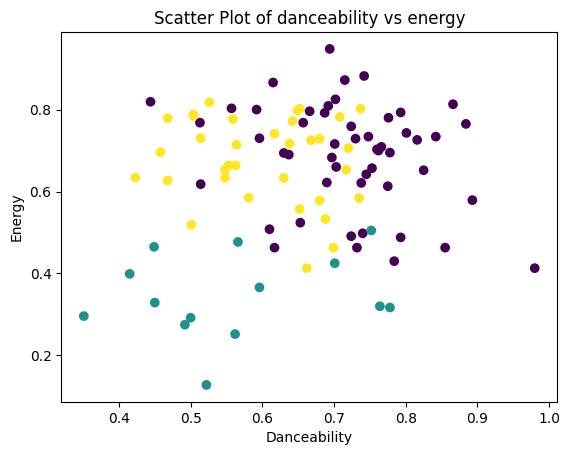

In [ ]:
import matplotlib.pyplot as plt

# data pela k means na
plt.scatter(df['danceability'], df['energy'], c=df['cluster'], cmap='viridis')
plt.title('Scatter Plot of danceability vs energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


<ipython-input-16-7b772bc5fcdb>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_one['danceability'], cluster_one['energy'], label='Cluster 0', cmap='viridis')


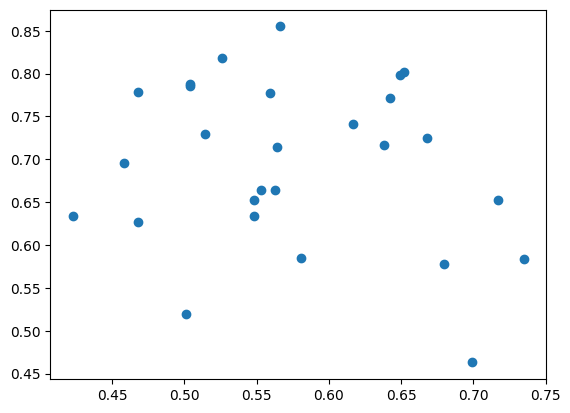

In [16]:

cluster_one = df[df['cluster'] == 0]
plt.scatter(cluster_one['danceability'], cluster_one['energy'], label='Cluster 0', cmap='viridis')


In [ ]:
import matplotlib.pyplot as plt


# 'cluster' with the actual column name containing cluster labels
# Replace 0, 1, 2 with the cluster
cluster_one = df[df['cluster'] == 0]
cluster_two = df[df['cluster'] == 1]
cluster_three = df[df['cluster'] == 2]


plt.scatter(cluster_one['PCA_Component_1'], cluster_one['PCA_Component_2'], label='Cluster 0', cmap='viridis')
plt.scatter(cluster_two['PCA_Component_1'], cluster_two['PCA_Component_2'], label='Cluster 1', cmap='viridis')
plt.scatter(cluster_three['PCA_Component_1'], cluster_three['PCA_Component_2'], label='Cluster 2', cmap='viridis')

plt.title('Song Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


KeyError: ignored

In [15]:
songs_in_cluster = df.get('Falling', cluster_number)

NameError: name 'cluster_number' is not defined

In [ ]:
import os

def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Specify the directory to search for CSV files
directory_to_search = '/path/to/your/directory'

# Find CSV files in the directory
csv_files_found = find_csv_files(directory_to_search)

# Print the list of CSV files found
if csv_files_found:
    print("CSV files found:")
    for csv_file in csv_files_found:
        print(csv_file)
else:
    print("No CSV files found in the specified directory.")


No CSV files found in the specified directory.


The file 'path/to/your/song_data.csv' does not exist.
